In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px
import seaborn as sns

# Clean importing csv and checking structure

In [10]:
#Define my working path
path = '/content/drive/MyDrive/Josue/Programas personales phyton/Curso Udemy Data Analytics Real-World Projects in Python/Series de tiempo/2-Time Series Data Analysis/individual_stocks_5yr'
os.chdir(path)
#print(os.getcwd());

In [11]:
#I create an empy list to concatenate my working csv's and read them in a single DataFrame
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']
all_data = pd.DataFrame()
for file in company_list:
	current_df = pd.read_csv(path + '/' + file)
	all_data = pd.concat([all_data, current_df])

In [12]:
all_data.shape

(4752, 7)

In [15]:
all_data.head()

(4752, 7)

In [29]:
#Check the unique name 
tech_list = all_data['Name'].unique()

In [23]:
#For better visualization, convert the string/object 'date' to date format
print(all_data.dtypes)
all_data['date'] = pd.to_datetime(all_data['date'])
print(all_data.dtypes)

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object
date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object


# Close price and volume price for 4 companies graphics

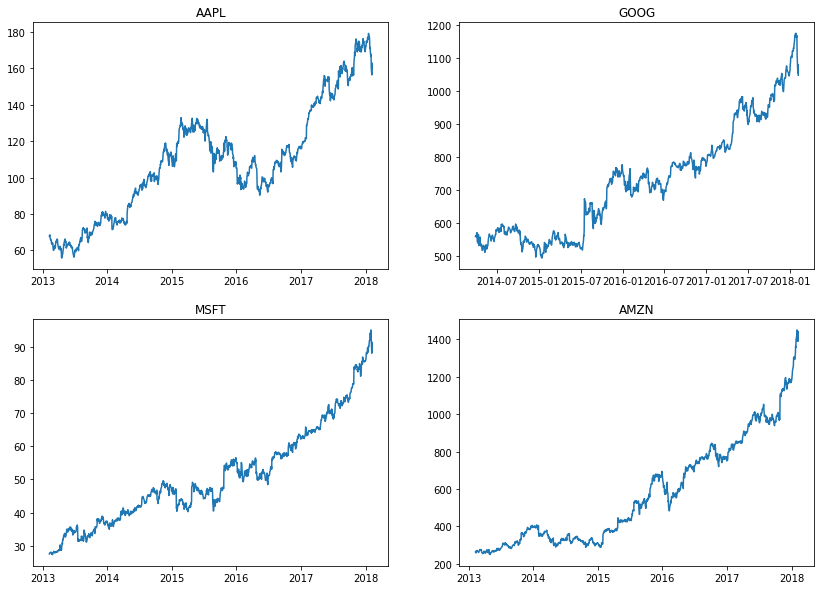

In [32]:
#With this, we can check the close price for every company 
plt.figure(figsize = (14,10))
for i,company in enumerate(tech_list,1):
	plt.subplot(2,2,i)
	df = all_data[all_data['Name'] == company]
	plt.plot(df['date'], df['close'])
	plt.xticks(rotation = 'horizontal')
	plt.title(company)

In [35]:
for company in tech_list:
	df = all_data[all_data['Name'] == company]
	fig = px.line(df, x = 'date', y = 'volume', title = company)
	fig.show()

# Apple prices analisys 

In [37]:
df2 = pd.read_csv('AAPL_data.csv')
df2.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [40]:
df2['Daily_price_change'] = df2['close'] - df2['open']
df2.head()

,date,open,high,low,close,volume,Name,Daily_price_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [46]:
df2['1dat % return'] = ((df2['close'] - df2['open']) / df2['close']) *100

In [48]:
df2.head()

,date,open,high,low,close,volume,Name,Daily_price_change,1dat % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [47]:
fig = px.line(df2, x = 'date', y='1dat % return', title=company)
fig.show()

In [49]:
df3 = df2.copy()
df3.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily_price_change    float64
1dat % return         float64
dtype: object

In [50]:
df3['date'] = pd.to_datetime(df3['date'])
df3.set_index('date', inplace = True)
df3.head()

,open,high,low,close,volume,Name,Daily_price_change,1dat % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [52]:
df3['2013-02-08' : '2013-02-14']

,open,high,low,close,volume,Name,Daily_price_change,1dat % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


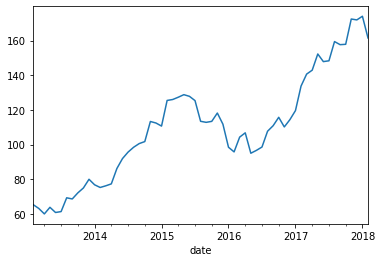

In [53]:
#Monthly analysis
df3['close'].resample('M').mean().plot();

In [54]:
df3['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

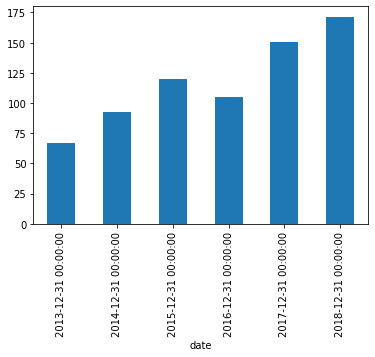

In [57]:
#by year
df3['close'].resample('Y').mean().plot(kind='bar');

#Correlation between Apple-Amazon-Microsoft-Google close prices

In [65]:
aapl = pd.read_csv('AAPL_data.csv')
amzn = pd.read_csv('AMZN_data.csv')
msft = pd.read_csv('MSFT_data.csv')
goog = pd.read_csv('GOOG_data.csv')
print(aapl.head(), '\n', amzn.head(), '\n', msft.head(), '\n', goog.head())

         date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL 
          date    open    high      low   close   volume  Name
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN 
          date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990

In [66]:
#Choosing just close prices from 4 companies
close = pd.DataFrame()
close['aapl'] = aapl['close']
close['goog'] = goog['close']
close['amzn'] = amzn['close']
close['msft'] = msft['close']

In [67]:
close.head()

,aapl,goog,amzn,msft
0,67.8542,558.46,261.95,27.55
1,68.5614,559.99,257.21,27.86
2,66.8428,556.97,258.70,27.88
3,66.7156,567.16,269.47,28.03
4,66.6556,567.00,269.24,28.04


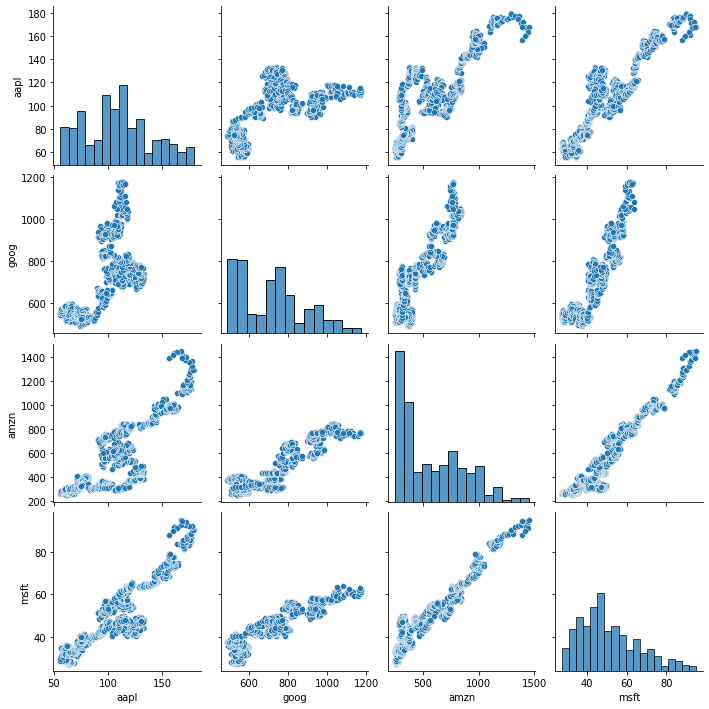

In [69]:
sns.pairplot(data=close)

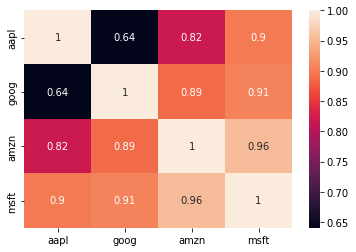

In [70]:
sns.heatmap(close.corr(), annot=True)

#Risk analysis

In [82]:
data = pd.DataFrame()

In [83]:
data['aapl_change'] = ((aapl['close'] - aapl['open']) / aapl['close']) * 100
data['goog_change'] = ((goog['close'] - goog['open']) / goog['close']) * 100
data['amzn_change'] = ((amzn['close'] - amzn['open']) / amzn['close']) * 100
data['msft_change'] = ((msft['close'] - msft['open']) / msft['close']) * 100

In [85]:
data.head()

,aapl_change,goog_change,amzn_change,msft_change
0,0.206325,-1.708269,0.209964,0.725953
1,0.714688,-0.216075,-2.328836,0.753769
2,-2.481344,-1.781065,-0.189409,0.000000
3,-0.042869,1.489879,2.946525,0.356761
4,0.443624,0.334039,0.694548,0.427960


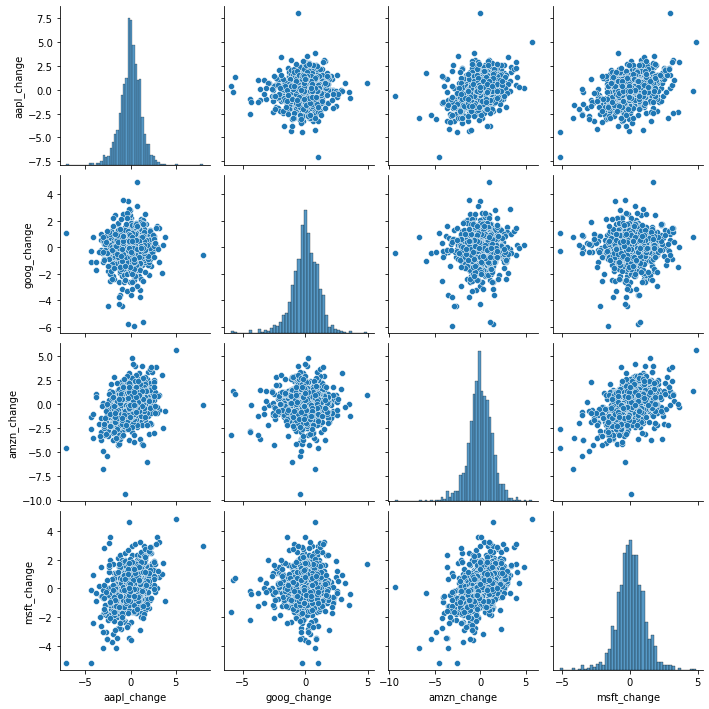

In [86]:
sns.pairplot(data=data)

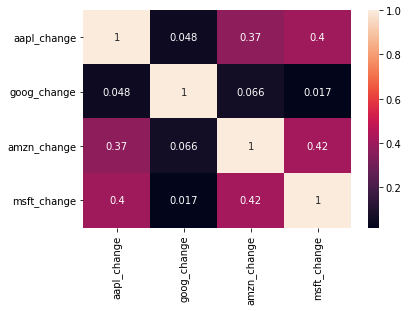

In [87]:
sns.heatmap(data.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



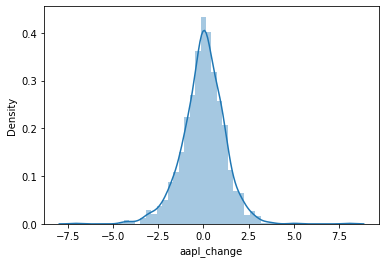

In [91]:
sns.distplot(data['aapl_change'])

In [93]:
#68.3% of data
data['aapl_change'].std()

1.1871377131421237

In [94]:
#95.4% of data
data['aapl_change'].std()*2

2.3742754262842474

In [95]:
#99.7% of data
data['aapl_change'].std()*3

3.561413139426371

In [98]:
#This mean, my daily loss will not exceed this quantity
data['aapl_change'].quantile(0.1)

-1.4246644227944307

In [99]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
aapl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
